importing libray

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import mplcursors

Taking input from CSV file

In [2]:
input = pd.read_csv('input.csv', header=None, skiprows=1)

input.columns = ['SYMBOL', 'VALUE', 'DAY']

first_row = input.iloc[0]

symbol = first_row['SYMBOL']
value = first_row['VALUE']
day = first_row['DAY']

print(f"Symbol: {symbol}, Value: {value}, Day: {day}")


Symbol: TCS, Value: 60, Day: 3


preprocessing of the data

In [3]:
data = pd.read_csv(f'../{symbol}_stock_data.csv')

data['%Delivery'] = data['%Delivery'].str.rstrip('%').astype('float') #scrappped data is object so converted into the float
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') #convert the date into %d %m %y
data.set_index('Date', inplace=True) #make index as data

slicing of data

In [4]:
data_2023 = data['2023-04-01':'2023-06-01']
print(data_2023['%Delivery'])

Date
2023-04-03     NaN
2023-04-05    51.0
2023-04-06    49.9
2023-04-10    26.9
2023-04-11    56.6
2023-04-12    47.4
2023-04-13    39.8
2023-04-17    62.4
2023-04-18    70.1
2023-04-19    41.3
2023-04-20    43.0
2023-04-21    59.3
2023-04-24    65.4
2023-04-25    66.1
2023-04-26    59.2
2023-04-27    58.2
2023-04-28    65.9
2023-05-02    67.5
2023-05-03    71.4
2023-05-04    44.3
2023-05-05    50.8
2023-05-08    60.0
2023-05-09    65.5
2023-05-10    40.9
2023-05-11    31.6
2023-05-12    59.1
2023-05-15    61.0
2023-05-16    64.4
2023-05-17    64.6
2023-05-18    56.4
2023-05-19    58.2
2023-05-22    56.2
2023-05-23    70.6
2023-05-24    69.6
2023-05-25    46.7
2023-05-26    71.2
2023-05-29    58.7
2023-05-30    69.1
2023-05-31    81.2
2023-06-01    59.7
Name: %Delivery, dtype: float64


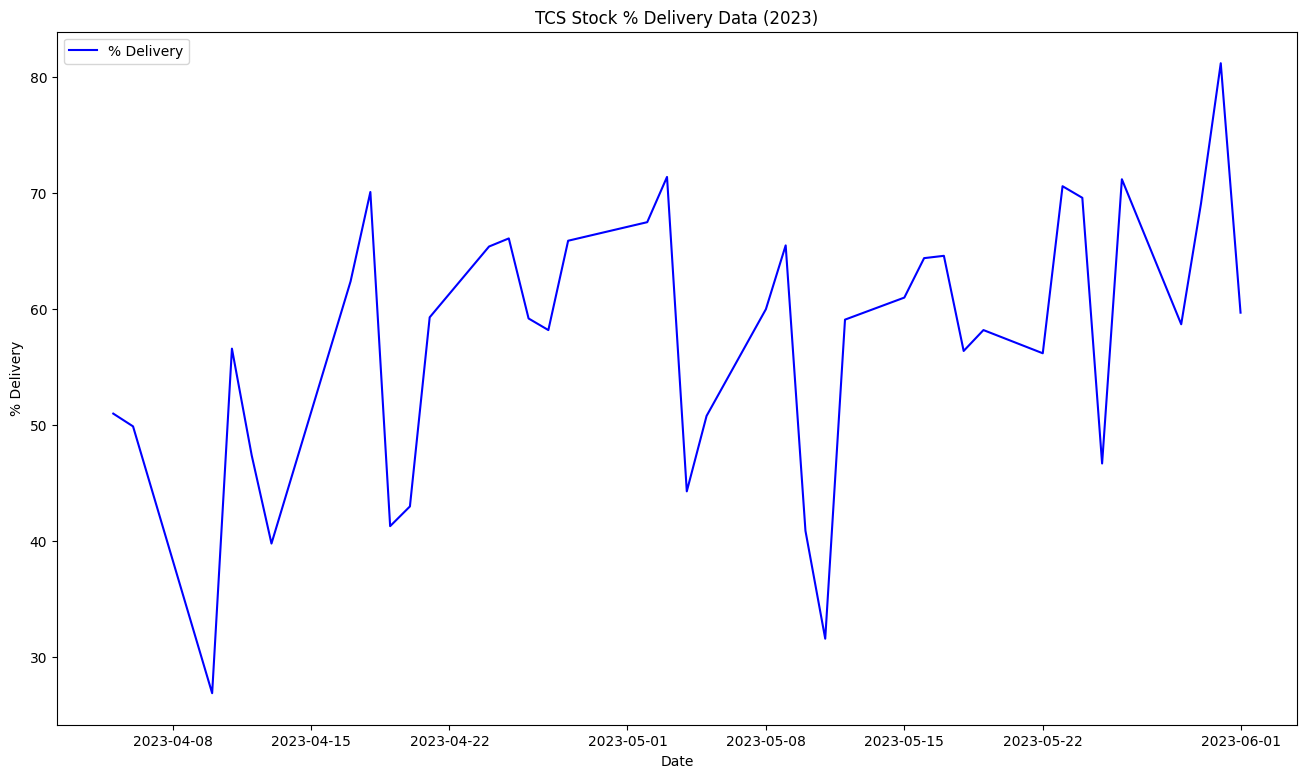

In [5]:
plt.figure(figsize=(16, 9))  # Width, Height

# Plot the sliced data with custom colors
plt.plot(data_2023['%Delivery'], color='blue', label='% Delivery')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('% Delivery')
plt.title('TCS Stock % Delivery Data (2023)')


plt.legend()
plt.show()

2023-05-03
2023-05-17


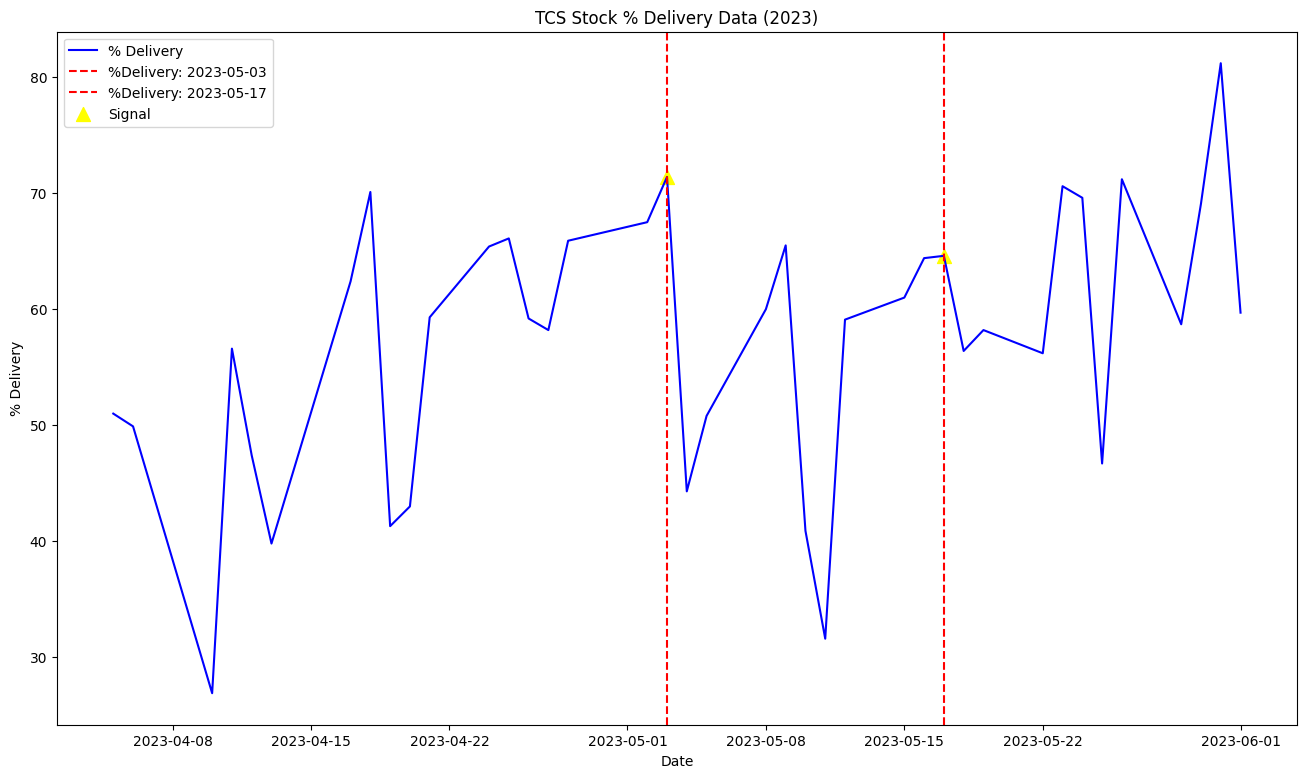

In [6]:
consecutive_days = 0
signal_dates = []

for date in data_2023.index:
    delivery = data_2023.loc[date, '%Delivery']
    if delivery > value:  # % > 60
        consecutive_days += 1
        if consecutive_days == day:
            signal_dates.append(date)
            consecutive_days = 0  # Reset counter
    else:
        consecutive_days = 0  # Reset counter


plt.figure(figsize=(16, 9))  # Width, Height

# Plot the sliced data with custom colors
plt.plot(data_2023['%Delivery'], color='blue', label='% Delivery')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('% Delivery')
plt.title('TCS Stock % Delivery Data (2023)')

for signal_date in signal_dates:
    date_str = signal_date.strftime('%Y-%m-%d')
    print(date_str)
    num_date = date2num(signal_date) #matplotlib.dates module, converts the given Timestamp object into a numeric val
    plt.axvline(x=num_date, color='red', linestyle='--', label='%Delivery: ' + date_str)

signal_num_dates = [date2num(date) for date in signal_dates]

# Scatter plot with triangle markers
plt.scatter(signal_num_dates, [data_2023.loc[date, '%Delivery'] for date in signal_dates],
            marker='^', color='yellow', s=100, label='Signal')

plt.legend()
plt.show()